In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns
import math
from scipy import signal

In [2]:
# 지수 표현 제거
pd.options.display.float_format = '{:.5f}'.format

# Normal signal

In [13]:
# sampling rate
fs = 10000000 # 10MHz

# signal length
t = np.arange(0, 3, 1 / fs) # s, sampling interval, time array

# generate signal
f1 = 60 # 60Hz
signal_f = 2*np.sin(2*np.pi*f1*t)  # amplitude = 2

# generate noise signal
np.random.seed(222)
n1 = np.random.uniform(1000000, 1500000, len(t)) # 1MHz ~ 1.5 MHz
signal_n = 0.2*np.sin(2*np.pi*n1*t)

# total signal
normal_signal = signal_f + signal_n

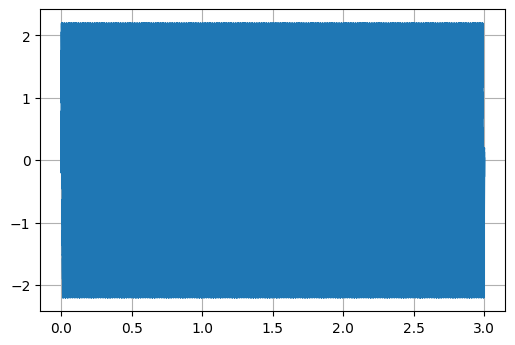

In [14]:
# visualizing signal

plt.figure(num = 1, dpi = 100)
plt.plot(t, normal_signal)
plt.grid()

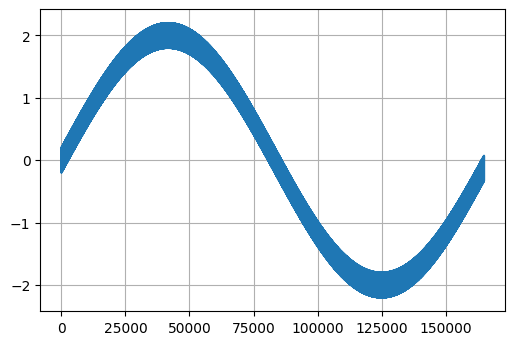

In [24]:
# visualizing signal

plt.figure(num = 1, dpi = 100)
plt.plot(normal_signal[:165000])
plt.grid()

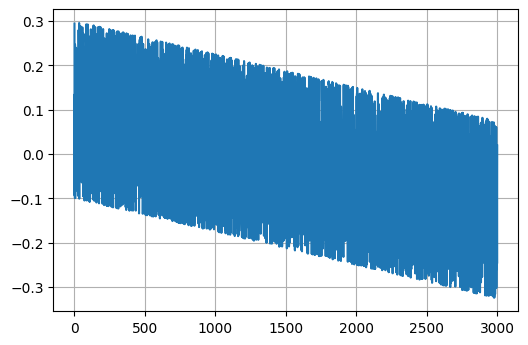

In [35]:
# visualizing signal

plt.figure(num = 1, dpi = 100)
plt.plot(normal_signal[82000:85000])
plt.grid()

# Arc signal

In [39]:
#  generate noise Arc signal

n3 = 4000000 # 4MHz

np.random.seed(333)
random_mag_Arc = np.random.uniform(0.8, 1.1, 3000)
arc_signal = random_mag_Arc*np.sin(2*np.pi*n3*t[82000:85000])

arc_signal # 아크 신호

array([-4.34264837e-11,  5.98768148e-01, -7.65661776e-01, ...,
       -9.34542268e-01,  9.01865762e-01, -5.16869300e-01])

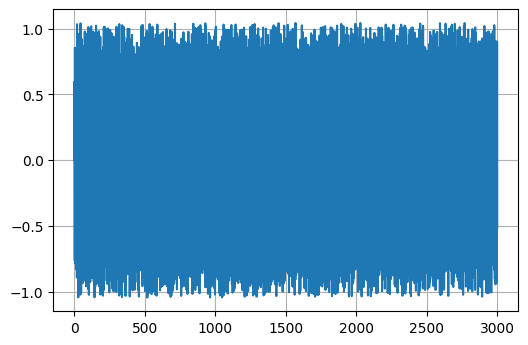

In [51]:
# visualizing signal

plt.figure(num = 1, dpi = 100)
plt.plot(arc_signal)
plt.grid()

In [43]:
temp = list(normal_signal) # shoulder 범위만 아크 신호를 더해주기 위해 타입변환

i,j = 1, 0
s0 = temp[82000*0+3000*0:82000*1+3000*0]
end = (82000*1)+(3000*0)

while (len(s0) < len(normal_signal)):
    start = end

    if i == j: # shoulder 범위가 아닐때 그냥 신호 더해줌.
        i += 1
        end = (82000*i)+(3000*j)
        s0 = s0+temp[start:end]
    elif i!=j: # shoulder 범위일 경우 아크 신호 더함.
        j += 1
        end = (82000*i)+(3000*j)
        x = temp[start:end] + arc_signal
        s0 = s0+ list(x) 

        
sig = np.array(s0) # numpy array type으로 변환

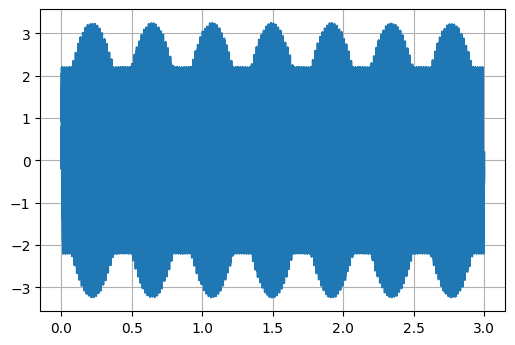

In [46]:
# visualizing signal

plt.figure(num = 1, dpi = 100)
plt.plot(t, sig)
plt.grid()

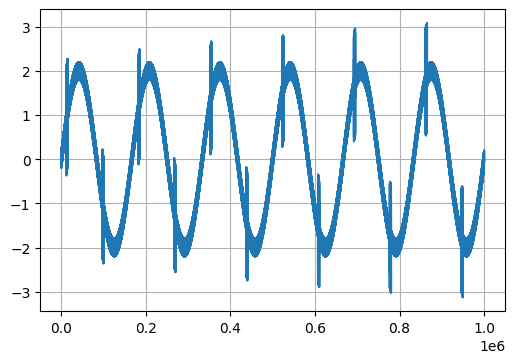

In [58]:
# visualizing signal

plt.figure(num = 1, dpi = 100)
plt.plot(sig[5000000:6000000])
plt.grid()